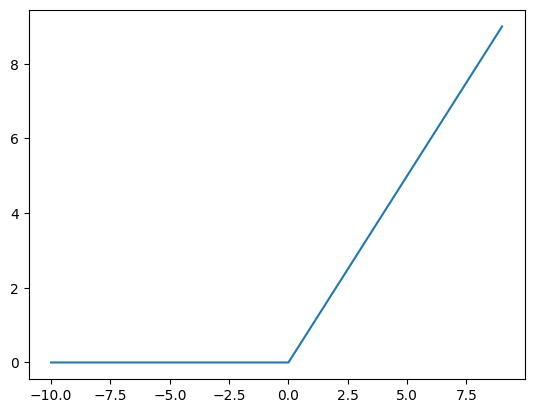

In [18]:
# example plot for the relu activation function
from matplotlib import pyplot

# rectified linear function
def rectified(x):
	return max(0.0, x)

# define input data
inputs = [x for x in range(-10, 10)]
# calculate outputs
outputs = [rectified(x) for x in inputs]
# plot inputs vs outputs
pyplot.plot(inputs, outputs)
pyplot.show()

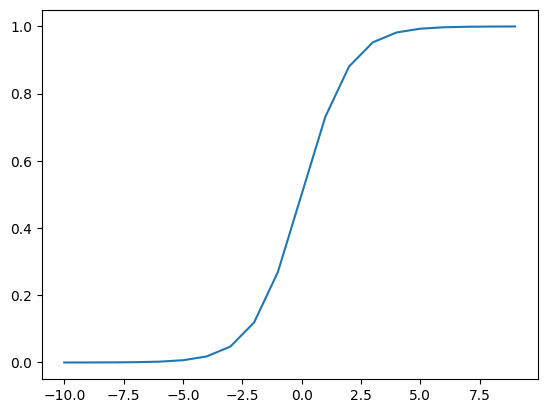

In [19]:
from math import exp
from matplotlib import pyplot

# sigmoid activation function
def sigmoid(x):
	return 1.0 / (1.0 + exp(-x))

# define input data
inputs = [x for x in range(-10, 10)]
# calculate outputs
outputs = [sigmoid(x) for x in inputs]
# plot inputs vs outputs
pyplot.plot(inputs, outputs)
pyplot.show()

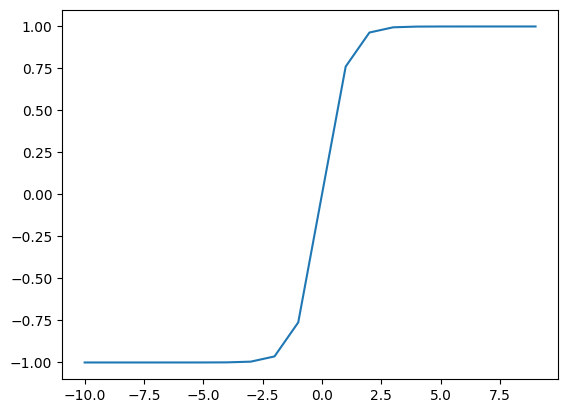

In [20]:
from math import exp
from matplotlib import pyplot

# tanh activation function
def tanh(x):
	return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

# define input data
inputs = [x for x in range(-10, 10)]
# calculate outputs
outputs = [tanh(x) for x in inputs]
# plot inputs vs outputs
pyplot.plot(inputs, outputs)
pyplot.show()

In [21]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
data, labels = make_blobs(n_samples=2000, centers=4, n_features=2,random_state=0)
print(data.shape, labels.shape)

(2000, 2) (2000,)


In [22]:
import matplotlib.colors
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","blue","purple","grey"])

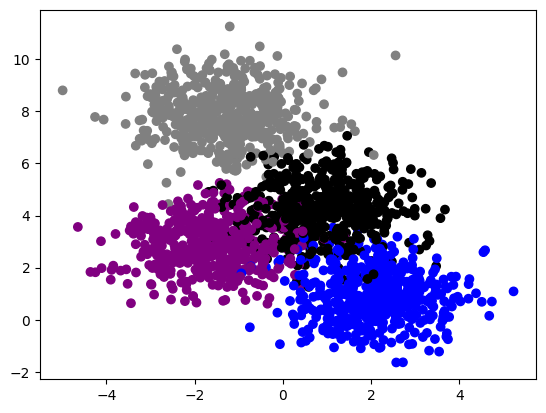

In [23]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [24]:
from scipy.special import expit

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_test.shape)

(1500, 2) (500, 2)


In [25]:
import numpy as np
from tqdm import tqdm

class SigmoidNeuron:

    def __init__(self):
        self.w = None
        self.b = None

    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b

    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))

    def grad_w_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x

    def grad_b_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)

    def grad_w_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred * x
        elif y == 1:
            return -1 * (1 - y_pred) * x
        else:
            raise ValueError("y should be 0 or 1")

    def grad_b_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred
        elif y == 1:
            return -1 * (1 - y_pred)
        else:
            raise ValueError("y should be 0 or 1")

    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):

        # initialise w, b
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        if display_loss:
            loss = {}

        for i in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                if loss_fn == "mse":
                    dw += self.grad_w_mse(x, y)
                    db += self.grad_b_mse(x, y)
                elif loss_fn == "ce":
                    dw += self.grad_w_ce(x, y)
                    db += self.grad_b_ce(x, y)

            m = X.shape[1]
            self.w -= learning_rate * dw/m
            self.b -= learning_rate * db/m

            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                if loss_fn == "mse":
                    loss[i] = mean_squared_error(Y, Y_pred)
                elif loss_fn == "ce":
                    loss[i] = log_loss(Y, Y_pred)

        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            if loss_fn == "mse":
                plt.ylabel('Mean Squared Error')
            elif loss_fn == "ce":
                plt.ylabel('Log Loss')
            plt.show()

    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

100%|██████████| 2000/2000 [01:40<00:00, 19.81epoch/s]


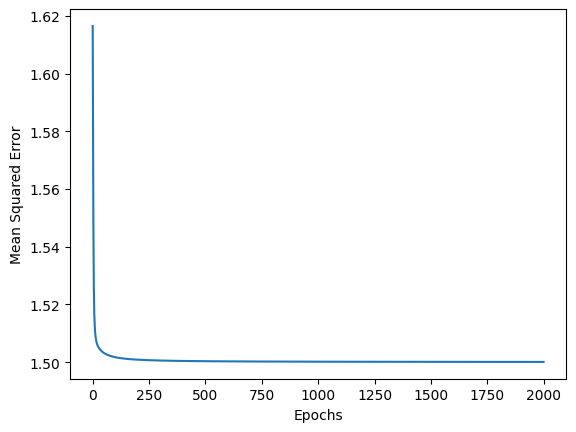

In [26]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs=2000, learning_rate=0.01, display_loss=True)

In [27]:
Y_pred_val = sn.predict(X_test)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

accuracy_val = accuracy_score(Y_pred_binarised_val, Y_test)

print("Validation accuracy", round(accuracy_val, 2))

Validation accuracy 0.25


In [28]:
Y_pred_val = sn.predict(X_test)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

accuracy_val = accuracy_score(Y_pred_binarised_val, Y_test)

print("Validation accuracy", round(accuracy_val, 2))

Validation accuracy 0.25


(1000, 2) (1000,)


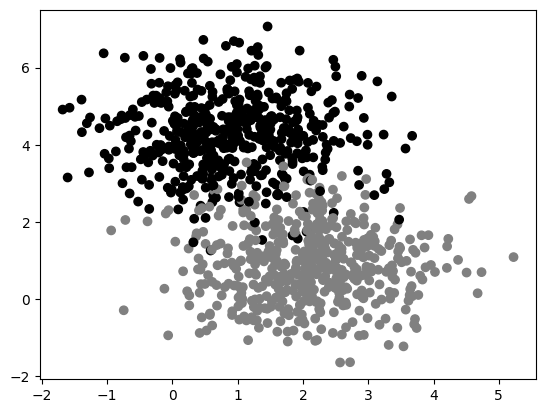

(1000, 2) (1000,)
(750, 2) (250, 2)


In [29]:
data1, labels1 = make_blobs(n_samples=1000, centers=2, n_features=2,random_state=0)
print(data1.shape, labels1.shape)
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","blue","purple","grey"])
plt.scatter(data1[:,0], data1[:,1], c=labels1, cmap=my_cmap)
plt.show()

#convert labels from 0/1 to -1/1
labels2 = []
for x in labels1:
    if x == 0:
        labels2.append(-1)
    else:
        labels2.append(x)
labels2 = np.array(labels2)
print(data1.shape, labels2.shape)

X_train, X_test, Y_train, Y_test = train_test_split(data1, labels2, stratify=labels2, random_state=0)
print(X_train.shape, X_test.shape)

In [30]:
import numpy as np
from tqdm import tqdm
import math

class SigmoidNeuron:

    def __init__(self):
        self.w = None
        self.b = None

    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b

    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))

    # tanh activation function
    def tanh(self,x):
        return np.tanh(x)
        #return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

    def grad_w_mse(self, x, y):
        #y_pred = self.sigmoid(self.perceptron(x))
        y_pred = self.tanh(self.perceptron(x))
        return (y_pred - y) * (1 - y_pred**2) * x

    def grad_b_mse(self, x, y):
        #y_pred = self.sigmoid(self.perceptron(x))
        y_pred = self.tanh(self.perceptron(x))
        return (y_pred - y) * (1 - y_pred**2)

    def grad_w_ce(self, x, y):
        #y_pred = self.sigmoid(self.perceptron(x))
        y_pred = self.tanh(self.perceptron(x))
        if y == 0:
            return y_pred * x
        elif y == 1:
            return -1 * (1 - y_pred) * x
        else:
            raise ValueError("y should be 0 or 1")

    def grad_b_ce(self, x, y):
        #y_pred = self.sigmoid(self.perceptron(x))
        y_pred = self.tanh(self.perceptron(x))
        if y == 0:
            return y_pred
        elif y == 1:
            return -1 * (1 - y_pred)
        else:
            raise ValueError("y should be 0 or 1")

    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, initialize_type = "random", loss_fn="mse", display_loss=False):

        # initialise w, b
        if initialise:
            # W_l weight array needed to get input for current layer l
            # size_l  size of current layer (in case of sigmoid neuron it is 1)
            # size_l-1  size of previous layer(in case of sigmoid neuron it is number of inputs)
            #Xavier W_l = np.random.randn(size_l, size_l-1)*np.sqrt(1, size_l-1)
            if initialize_type == "xavier":
                self.w = np.random.randn(1, X.shape[1])*np.sqrt(1/X.shape[1])
            else:
                self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        if display_loss:
            loss = {}

        for i in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                if loss_fn == "mse":
                    dw += self.grad_w_mse(x, y)
                    db += self.grad_b_mse(x, y)
                elif loss_fn == "ce":
                    dw += self.grad_w_ce(x, y)
                    db += self.grad_b_ce(x, y)

            m = X.shape[1]
            self.w -= learning_rate * dw/m
            self.b -= learning_rate * db/m

            if display_loss:
                #Y_pred = self.sigmoid(self.perceptron(X))
                Y_pred = self.tanh(self.perceptron(X))
                #print(Y_pred)
                if loss_fn == "mse":
                    loss[i] = mean_squared_error(Y, Y_pred)
                elif loss_fn == "ce":
                    loss[i] = log_loss(Y, Y_pred)

        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            if loss_fn == "mse":
                plt.ylabel('Mean Squared Error')
            elif loss_fn == "ce":
                plt.ylabel('Log Loss')
            plt.show()

    def predict(self, X):
        Y_pred = []
        for x in X:
            #y_pred = self.sigmoid(self.perceptron(x))
            y_pred = self.tanh(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

100%|██████████| 2000/2000 [00:36<00:00, 54.10epoch/s]


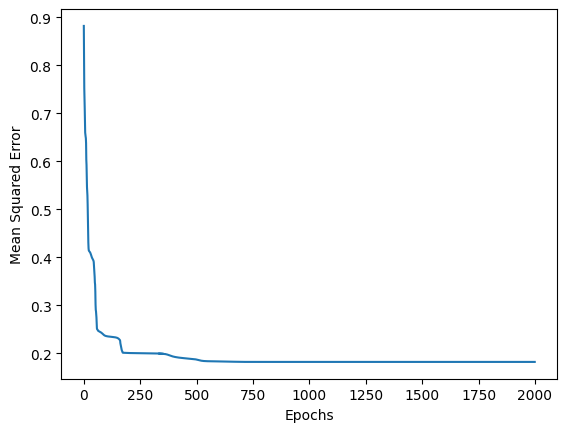

In [31]:
tanH = SigmoidNeuron()
tanH.fit(X_train, Y_train, epochs=2000, learning_rate=0.09, display_loss=True)

In [32]:
Y_pred_val = tanH.predict(X_test)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

accuracy_val = accuracy_score(Y_pred_binarised_val, Y_test)

print("Validation accuracy", round(accuracy_val, 2))

Validation accuracy 0.46


100%|██████████| 2000/2000 [00:36<00:00, 54.50epoch/s]


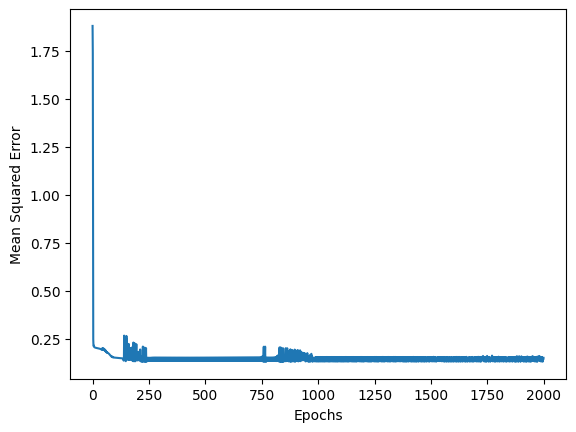

In [33]:
tanH2 = SigmoidNeuron()
tanH2.fit(X_train, Y_train, epochs=2000, learning_rate=0.09,initialize_type="xavier", display_loss=True)

In [34]:
Y_pred_val = tanH2.predict(X_test)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

accuracy_val = accuracy_score(Y_pred_binarised_val, Y_test)

print("Validation accuracy", round(accuracy_val, 2))

Validation accuracy 0.48
